In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv("Dataset/data.csv")

print (data.head)


<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.drop(['Unnamed: 32', 'id'], axis = 1, inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]


In [5]:
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis = 1)


In [6]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))


In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.15, random_state = 42)
 
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T
 
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (30, 483)
x test:  (30, 86)
y train:  (483,)
y test:  (86,)


In [8]:
def initialize_weights_and_bias(dimension):
	w = np.full((dimension, 1), 0.01)
	b = 0.0
	return w, b


In [9]:
# z = np.dot(w.T, x_train)+b
def sigmoid(z):
	y_head = 1/(1 + np.exp(-z))
	return y_head


In [10]:
def forward_backward_propagation(w, b, x_train, y_train):
	z = np.dot(w.T, x_train) + b
	y_head = sigmoid(z)
	loss = - y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
	# x_train.shape[1] is for scaling
	cost = (np.sum(loss)) / x_train.shape[1]	 

	# backward propagation
	derivative_weight = (np.dot(x_train, (
		(y_head - y_train).T))) / x_train.shape[1] 
	derivative_bias = np.sum(
		y_head-y_train) / x_train.shape[1]				 
	gradients = {"derivative_weight": derivative_weight,
				"derivative_bias": derivative_bias}
	return cost, gradients


In [11]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):
	cost_list = []
	cost_list2 = []
	index = []

	# updating(learning) parameters is number_of_iterarion times
	for i in range(number_of_iterarion):
		# make forward and backward propagation and find cost and gradients
		cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
		cost_list.append(cost)

		# lets update
		w = w - learning_rate * gradients["derivative_weight"]
		b = b - learning_rate * gradients["derivative_bias"]
		if i % 10 == 0:
			cost_list2.append(cost)
			index.append(i)
			print ("Cost after iteration % i: % f" %(i, cost))

	# update(learn) parameters weights and bias
	parameters = {"weight": w, "bias": b}
	plt.plot(index, cost_list2)
	plt.xticks(index, rotation ='vertical')
	plt.xlabel("Number of Iterarion")
	plt.ylabel("Cost")
	plt.show()
	return parameters, gradients, cost_list


In [12]:
def predict(w, b, x_test):
	# x_test is a input for forward propagation
	z = sigmoid(np.dot(w.T, x_test)+b)
	Y_prediction = np.zeros((1, x_test.shape[1]))

	# if z is bigger than 0.5, our prediction is sign one (y_head = 1),
	# if z is smaller than 0.5, our prediction is sign zero (y_head = 0),
	for i in range(z.shape[1]):
		if z[0, i]<= 0.5:
			Y_prediction[0, i] = 0
		else:
			Y_prediction[0, i] = 1

	return Y_prediction


Cost after iteration  0:  0.692860
Cost after iteration  10:  0.691197
Cost after iteration  20:  0.689605
Cost after iteration  30:  0.688082
Cost after iteration  40:  0.686623
Cost after iteration  50:  0.685225
Cost after iteration  60:  0.683885
Cost after iteration  70:  0.682601
Cost after iteration  80:  0.681368
Cost after iteration  90:  0.680185
Cost after iteration  100:  0.679049
Cost after iteration  110:  0.677957
Cost after iteration  120:  0.676907
Cost after iteration  130:  0.675897
Cost after iteration  140:  0.674925
Cost after iteration  150:  0.673988
Cost after iteration  160:  0.673086
Cost after iteration  170:  0.672216
Cost after iteration  180:  0.671377
Cost after iteration  190:  0.670566
Cost after iteration  200:  0.669783
Cost after iteration  210:  0.669026
Cost after iteration  220:  0.668294
Cost after iteration  230:  0.667585
Cost after iteration  240:  0.666898
Cost after iteration  250:  0.666232
Cost after iteration  260:  0.665587
Cost after i

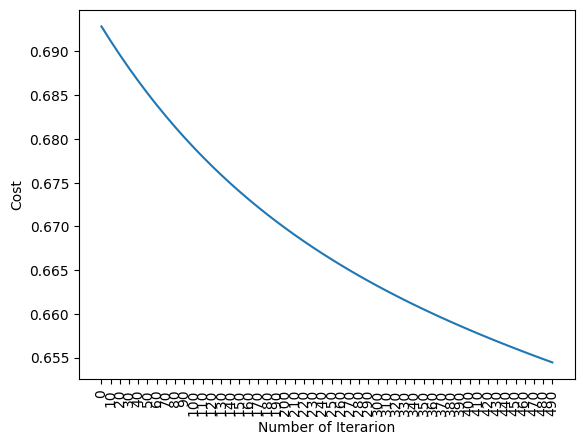

Train accuracy: 62.732919254658384 %
Test accuracy: 62.7906976744186 %
Final cost: 0.65410468090248


In [13]:
# Change the learning rate
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):

    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)

    # Reduce learning rate
    learning_rate = 0.01

    parameters, gradients, cost_list = update(
        w, b, x_train, y_train, learning_rate, num_iterations)

    y_prediction_test = predict(
        parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(
        parameters["weight"], parameters["bias"], x_train)

    # Print intermediate values during training
    print("Train accuracy: {} %".format(
        100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("Test accuracy: {} %".format(
        100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    print("Final cost:", cost_list[-1])

logistic_regression(x_train, y_train, x_test,
                    y_test, learning_rate=1, num_iterations=500)


NaN values in the dataset: 0


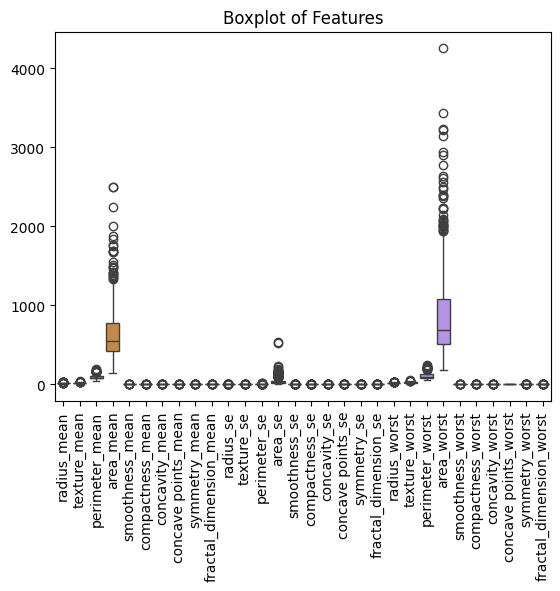

In [14]:
# Check for NaN values
print("NaN values in the dataset:", data.isnull().sum().sum())

# Check for outliers
sns.boxplot(data=data.drop(['diagnosis'], axis=1))
plt.title("Boxplot of Features")
plt.xticks(rotation=90)
plt.show()

# Verify gradient calculation
# Add print statements in forward_backward_propagation function to print intermediate values for debugging

# Try different optimization algorithms
# Replace update function with a different optimization algorithm such as SGD or Adam optimizer


In [16]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42, max_iter = 150)
print("test accuracy: {} ".format(
	logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(
	logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.8953488372093024 
train accuracy: 0.8633540372670807 
